<a href="https://colab.research.google.com/github/Seiaku/DS-Unit-2-Linear-Models/blob/master/Francisco_Romero_assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [0]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import numpy as np

In [0]:
df['price'].describe()

count    48818.000000
mean      3579.560982
std       1762.420875
min       1375.000000
25%       2500.000000
50%       3150.000000
75%       4095.000000
max      15500.000000
Name: price, dtype: float64

In [0]:
df.isna().sum()

bathrooms                  0
bedrooms                   0
created                    0
description             1425
display_address          133
latitude                   0
longitude                  0
price                      0
street_address            10
interest_level             0
elevator                   0
cats_allowed               0
hardwood_floors            0
dogs_allowed               0
doorman                    0
dishwasher                 0
no_fee                     0
laundry_in_building        0
fitness_center             0
pre-war                    0
laundry_in_unit            0
roof_deck                  0
outdoor_space              0
dining_room                0
high_speed_internet        0
balcony                    0
swimming_pool              0
new_construction           0
terrace                    0
exclusive                  0
loft                       0
garden_patio               0
wheelchair_access          0
common_outdoor_space       0
dtype: int64

In [0]:
df = df.fillna(method='ffill')

In [0]:
df.dropna;

In [0]:
import plotly.express as px
px.scatter(df, x = 'latitude', y = 'price')

In [0]:
# 1 
from sklearn.linear_model import LinearRegression

In [0]:
# 2
model = LinearRegression()

In [0]:
# 3
features = ['latitude']
target = 'price'
X = df[features]
y = df[target]

print(X.shape, y.shape)

(48818, 1) (48818,)


In [0]:
# 4
model.fit(X ,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
latitude = 5
X_test = [[latitude]]
y_pred = model.predict(X_test)

print(f'predicted price for {latitude} latitude : {y_pred[0]}')

predicted price for 5 latitude : 62144.37313458978


In [0]:
def predict(latitude):
  y_pred = model.predict([[latitude]])
  estimate = y_pred[0]
  coefficient = model.coef_[0]
  result = f'${estimate:,.0f} estimated price for {latitude:,.0f} latitude '
  explanation = f' In this linear regression, each addition latitude adds ${coefficient:,.0f}'
  return result + explanation

In [0]:
predict(5)

'$62,144 estimated price for 5 latitude  In this linear regression, each addition latitude adds $-1,638'

In [0]:
predict(6)

'$60,506 estimated price for 6 latitude  In this linear regression, each addition latitude adds $-1,638'

In [0]:
predict(0)

'$70,335 estimated price for 0 latitude  In this linear regression, each addition latitude adds $-1,638'

In [0]:
predict(100)

'$-93,479 estimated price for 100 latitude  In this linear regression, each addition latitude adds $-1,638'

In [0]:
from ipywidgets import interact
interact(predict, latitude=(0, 100))

interactive(children=(IntSlider(value=50, description='latitude'), Output()), _dom_classes=('widget-interact',…

<function __main__.predict>

In [0]:
model_mult = LinearRegression()

In [0]:
X = df[['elevator','dishwasher','bathrooms','bedrooms']]
y = df['price']

In [0]:
lr = pd.DataFrame(data=X2)
lr.columns = ['elevator','dishwasher','bathrooms','bedrooms']
lr.head()

,elevator,dishwasher,bathrooms,bedrooms
0,0,0,1.5,3
1,1,0,1.0,2
2,0,1,1.0,1
3,0,0,1.0,1
4,0,0,1.0,4


In [0]:
model_mult.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = model_mult.predict(X)

In [0]:
df_pred = pd.DataFrame({'actual':y, 'predicted':y_pred})
df_pred

,actual,predicted
0,3000,4454.373198
1,5465,3503.046912
2,2850,2835.246352
3,3275,2655.453517
4,3350,3868.424751
...,...,...
49347,3200,3682.839747
49348,3950,3098.723167
49349,2595,3098.723167
49350,3350,2694.399422


In [0]:
df_pred_plot = df_pred.head(15)

In [0]:
import matplotlib.pyplot as plt

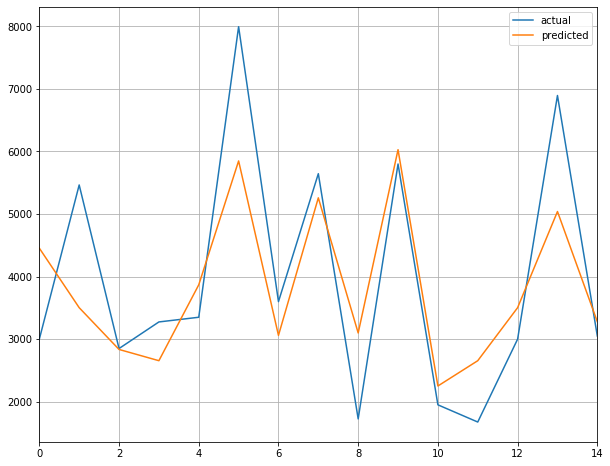

In [0]:
df_pred_plot.plot(kind='line',figsize=(10,8))
plt.grid()
plt.show()